In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('dane/dane_stacja_600.csv')
df['data_pomiaru'] = pd.to_datetime(df['data_pomiaru'])

### WAŻNE:
Opady podawane są jako `Opad za 6 godzin [mm]`. Oznacza to, że aby sumować opady z całej doby musimy je dzielić przez 4.

In [5]:
print("Podstawowe informacje o danych:")
print(df.info())
print("\nStatystyki opisowe:")
print(df.describe())

Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pomiaru         35064 non-null  datetime64[ns]
 1   godzina_pomiaru      35064 non-null  int64         
 2   temperatura          35064 non-null  float64       
 3   predkosc_wiatru      35064 non-null  int64         
 4   kierunek_wiatru      35064 non-null  int64         
 5   wilgotnosc_wzgledna  35064 non-null  int64         
 6   suma_opadu           35064 non-null  float64       
 7   cisnienie            35064 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.1 MB
None

Statystyki opisowe:
              data_pomiaru  godzina_pomiaru   temperatura  predkosc_wiatru  \
count                35064     35064.000000  35064.000000     35064.000000   
mean   2021-12-31 00:00:00        11.50

### Rozkład danych

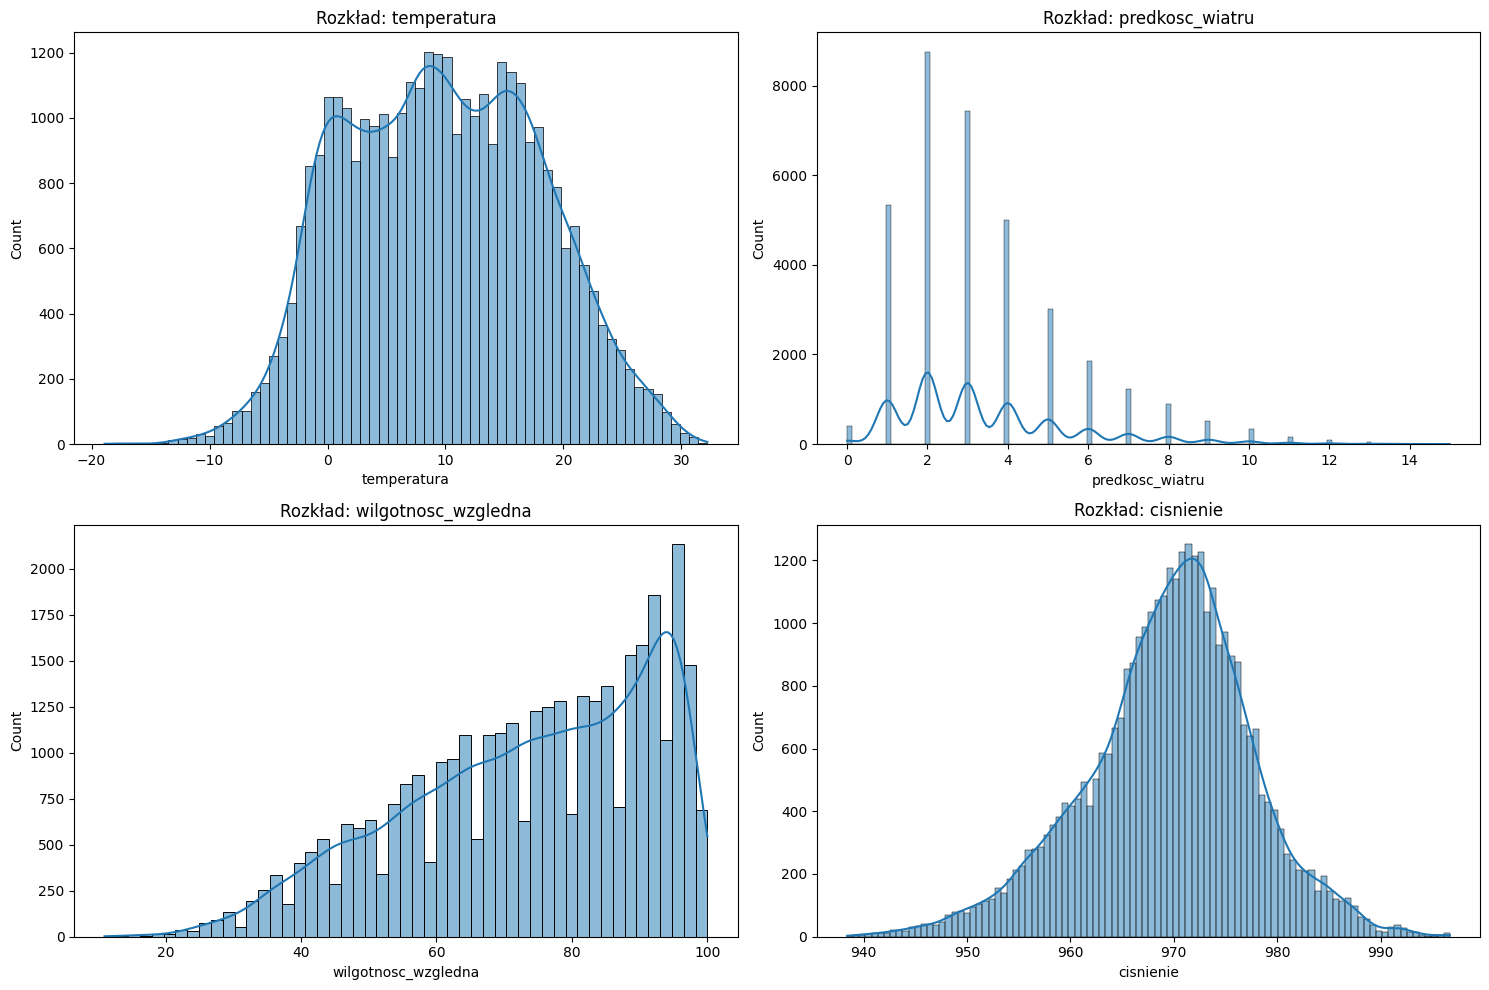

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['temperatura', 'predkosc_wiatru', 'wilgotnosc_wzgledna', 'cisnienie'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Rozkład: {column}')
plt.tight_layout()
plt.show()

### Średnia dzienna temperatura

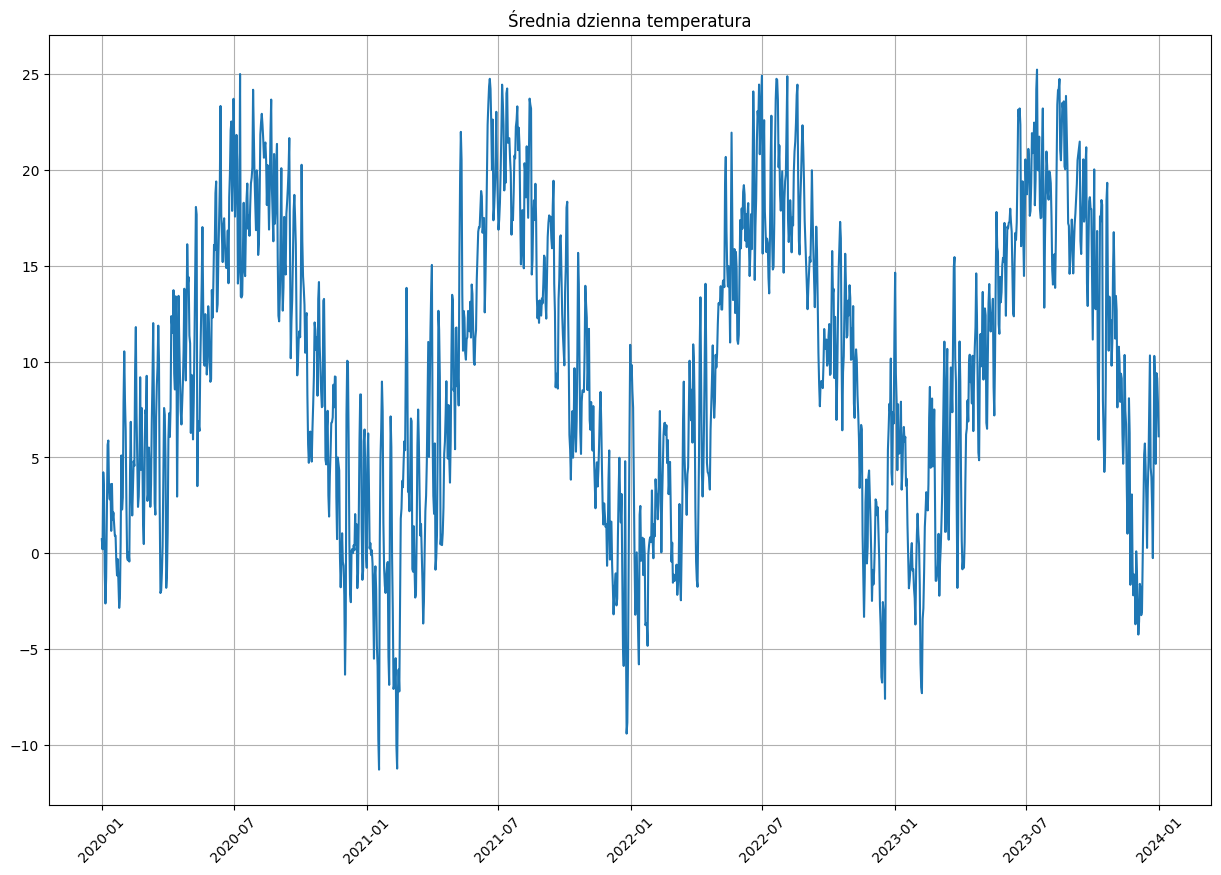

In [7]:
plt.figure(figsize=(15, 10))
daily_avg = df.groupby('data_pomiaru')['temperatura'].mean()
plt.plot(daily_avg.index, daily_avg.values)
plt.title('Średnia dzienna temperatura')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Macierz koorelacji

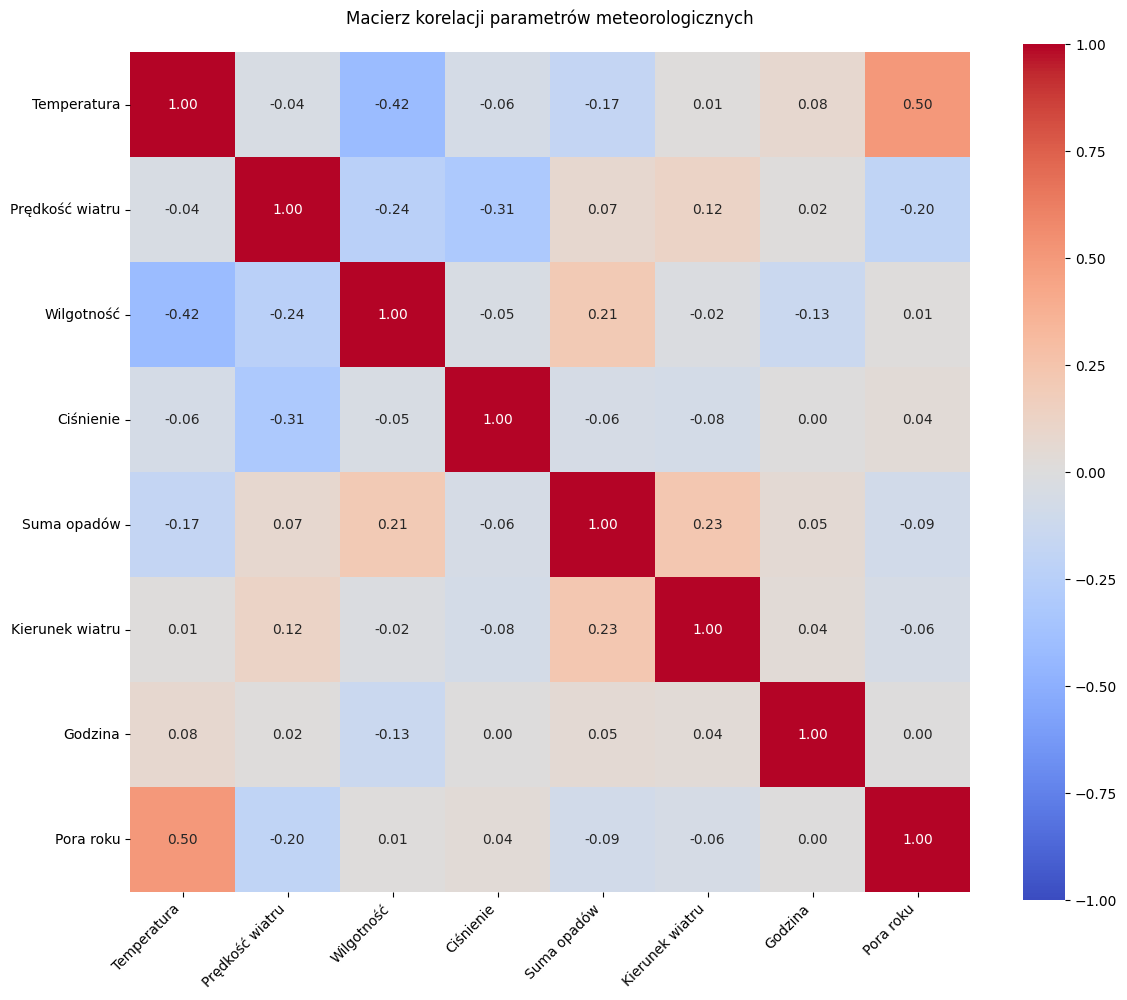


Najsilniejsze korelacje:
Temperatura - Pora roku: 0.501
Pora roku - Temperatura: 0.501
Temperatura - Wilgotność: -0.421
Wilgotność - Temperatura: -0.421
Ciśnienie - Prędkość wiatru: -0.313
Prędkość wiatru - Ciśnienie: -0.313
Wilgotność - Prędkość wiatru: -0.237
Prędkość wiatru - Wilgotność: -0.237
Kierunek wiatru - Suma opadów: 0.228
Suma opadów - Kierunek wiatru: 0.228


In [ ]:
df_corr = df.copy()
df_corr['suma_opadu'] = df_corr['suma_opadu'] / 4  # Korekta opadów

df_corr['pora_roku'] = df_corr['data_pomiaru'].dt.month.map({
    12: 1, 1: 1, 2: 1,  # Zima: 1
    3: 2, 4: 2, 5: 2,  # Wiosna: 2
    6: 3, 7: 3, 8: 3,  # Lato: 3
    9: 4, 10: 4, 11: 4  # Jesień: 4
})

df_corr['godzina'] = pd.to_numeric(df_corr['godzina_pomiaru'])

correlation_matrix = df_corr[['temperatura', 
                            'predkosc_wiatru', 
                            'wilgotnosc_wzgledna',
                            'cisnienie', 
                            'suma_opadu',
                            'kierunek_wiatru',
                            'godzina',
                            'pora_roku']].corr()

labels = {
    'temperatura': 'Temperatura',
    'predkosc_wiatru': 'Prędkość wiatru',
    'wilgotnosc_wzgledna': 'Wilgotność',
    'cisnienie': 'Ciśnienie',
    'suma_opadu': 'Suma opadów',
    'kierunek_wiatru': 'Kierunek wiatru',
    'godzina': 'Godzina',
    'pora_roku': 'Pora roku'
}

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            vmin=-1, vmax=1,
            xticklabels=[labels[col] for col in correlation_matrix.columns],
            yticklabels=[labels[col] for col in correlation_matrix.columns])

plt.title('Macierz korelacji parametrów meteorologicznych', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\nNajsilniejsze korelacje:")
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(key=abs, ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1.0]

for idx, val in sorted_correlations[:10].items():
    var1, var2 = idx
    print(f"{labels[var1]} - {labels[var2]}: {val:.3f}")

### Średnie statystyki miesięczne

In [9]:
df['miesiac'] = df['data_pomiaru'].dt.month
monthly_stats = df.groupby('miesiac').agg({
    'temperatura': ['mean', 'std'],
    'suma_opadu': 'sum',
    'predkosc_wiatru': 'mean',
    'wilgotnosc_wzgledna': 'mean'
}).round(2)

print("\nStatystyki miesięczne:")
print(monthly_stats)


Statystyki miesięczne:
        temperatura       suma_opadu predkosc_wiatru wilgotnosc_wzgledna
               mean   std        sum            mean                mean
miesiac                                                                 
1              1.21  4.48     1507.2            4.03               80.46
2              2.39  5.21     1821.6            4.83               75.11
3              4.30  5.47     1190.1            3.73               64.90
4              7.35  5.36     1164.4            3.35               64.87
5             12.32  4.75     1120.8            3.21               68.37
6             17.97  4.68      825.2            2.71               70.12
7             19.38  4.59      939.1            2.75               69.57
8             18.85  4.50      910.8            2.74               75.44
9             14.91  4.67      942.9            2.81               78.13
10            11.25  4.77     1205.4            3.43               75.14
11             5.11  4.56  

### Róża wiatrów 

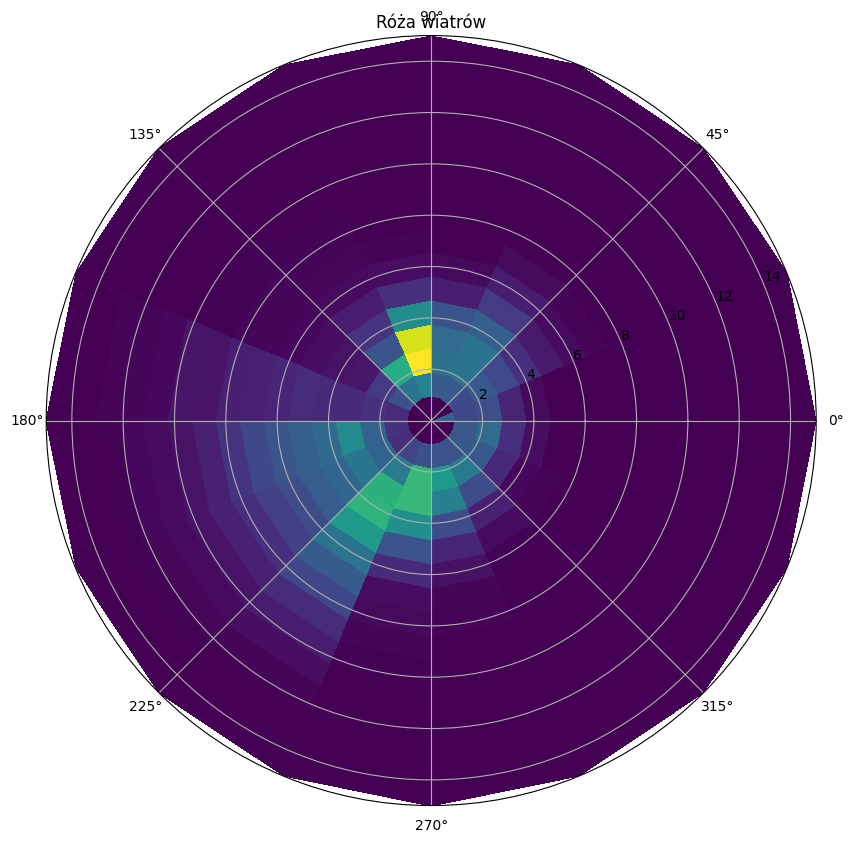

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(111, projection='polar')
kierunki = df['kierunek_wiatru']
predkosci = df['predkosc_wiatru']
plt.hist2d(np.radians(kierunki), predkosci, bins=[16, 16])
plt.title('Róża wiatrów')
plt.show()

### Ekstremalne wartości

In [11]:
print("\nEkstremalne wartości:")
for column in ['temperatura', 'predkosc_wiatru', 'suma_opadu']:
    max_val = df[column].max()
    max_date = df.loc[df[column].idxmax(), 'data_pomiaru']
    min_val = df[column].min()
    min_date = df.loc[df[column].idxmin(), 'data_pomiaru']
    print(f"\n{column}:")
    print(f"Maximum: {max_val:.2f} ({max_date})")
    print(f"Minimum: {min_val:.2f} ({min_date})")


Ekstremalne wartości:

temperatura:
Maximum: 32.20 (2022-07-01 00:00:00)
Minimum: -18.90 (2021-01-18 00:00:00)

predkosc_wiatru:
Maximum: 15.00 (2020-02-10 00:00:00)
Minimum: 0.00 (2020-01-01 00:00:00)

suma_opadu:
Maximum: 9.70 (2022-02-12 00:00:00)
Minimum: 0.00 (2020-01-01 00:00:00)


### Średni dobowy przebieg temperatury

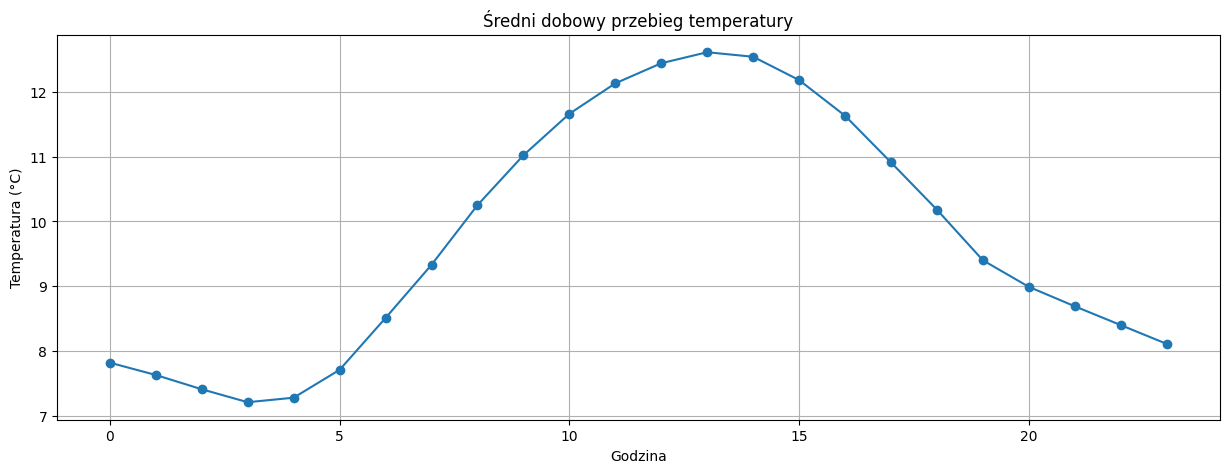

In [12]:
df['godzina'] = pd.to_numeric(df['godzina_pomiaru'])
hourly_avg = df.groupby('godzina').agg({
    'temperatura': 'mean',
    'wilgotnosc_wzgledna': 'mean',
    'predkosc_wiatru': 'mean'
}).round(2)

plt.figure(figsize=(15, 5))
plt.plot(hourly_avg.index, hourly_avg['temperatura'], marker='o')
plt.title('Średni dobowy przebieg temperatury')
plt.xlabel('Godzina')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

### Suma opadów miesięczna

<Figure size 2000x600 with 0 Axes>

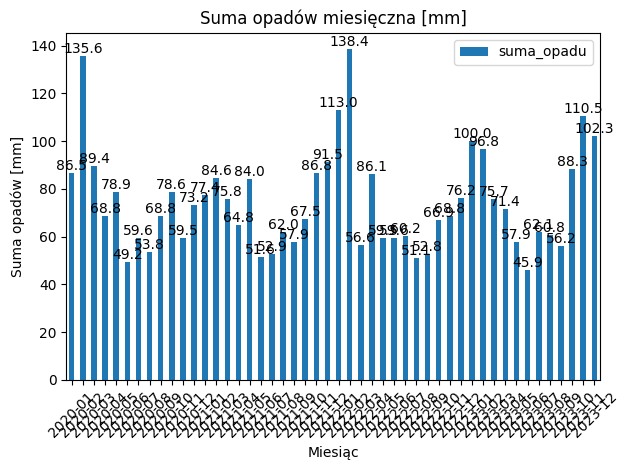


Statystyki miesięcznych sum opadów:
Średnia suma miesięczna: 74.5 mm
Maksymalna suma miesięczna: 138.4 mm
Minimalna suma miesięczna: 45.9 mm


In [19]:
# Sumy miesięczne podzielone przez 4 (aby uniknąć wielokrotnego liczenia tych samych opadów)
monthly_precipitation = (df.groupby(df['data_pomiaru'].dt.strftime('%Y-%m'))['suma_opadu']
                         .sum()
                         .div(4)
                         .reset_index())

plt.figure(figsize=(20, 6))
monthly_precipitation.plot(kind='bar', x='data_pomiaru', y='suma_opadu')
plt.title('Suma opadów miesięczna [mm]')
plt.xlabel('Miesiąc')
plt.ylabel('Suma opadów [mm]')
plt.xticks(rotation=45)

for i, v in enumerate(monthly_precipitation['suma_opadu']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nStatystyki miesięcznych sum opadów:")
print(f"Średnia suma miesięczna: {monthly_precipitation['suma_opadu'].mean():.1f} mm")
print(f"Maksymalna suma miesięczna: {monthly_precipitation['suma_opadu'].max():.1f} mm")
print(f"Minimalna suma miesięczna: {monthly_precipitation['suma_opadu'].min():.1f} mm")

### Dekompozycja

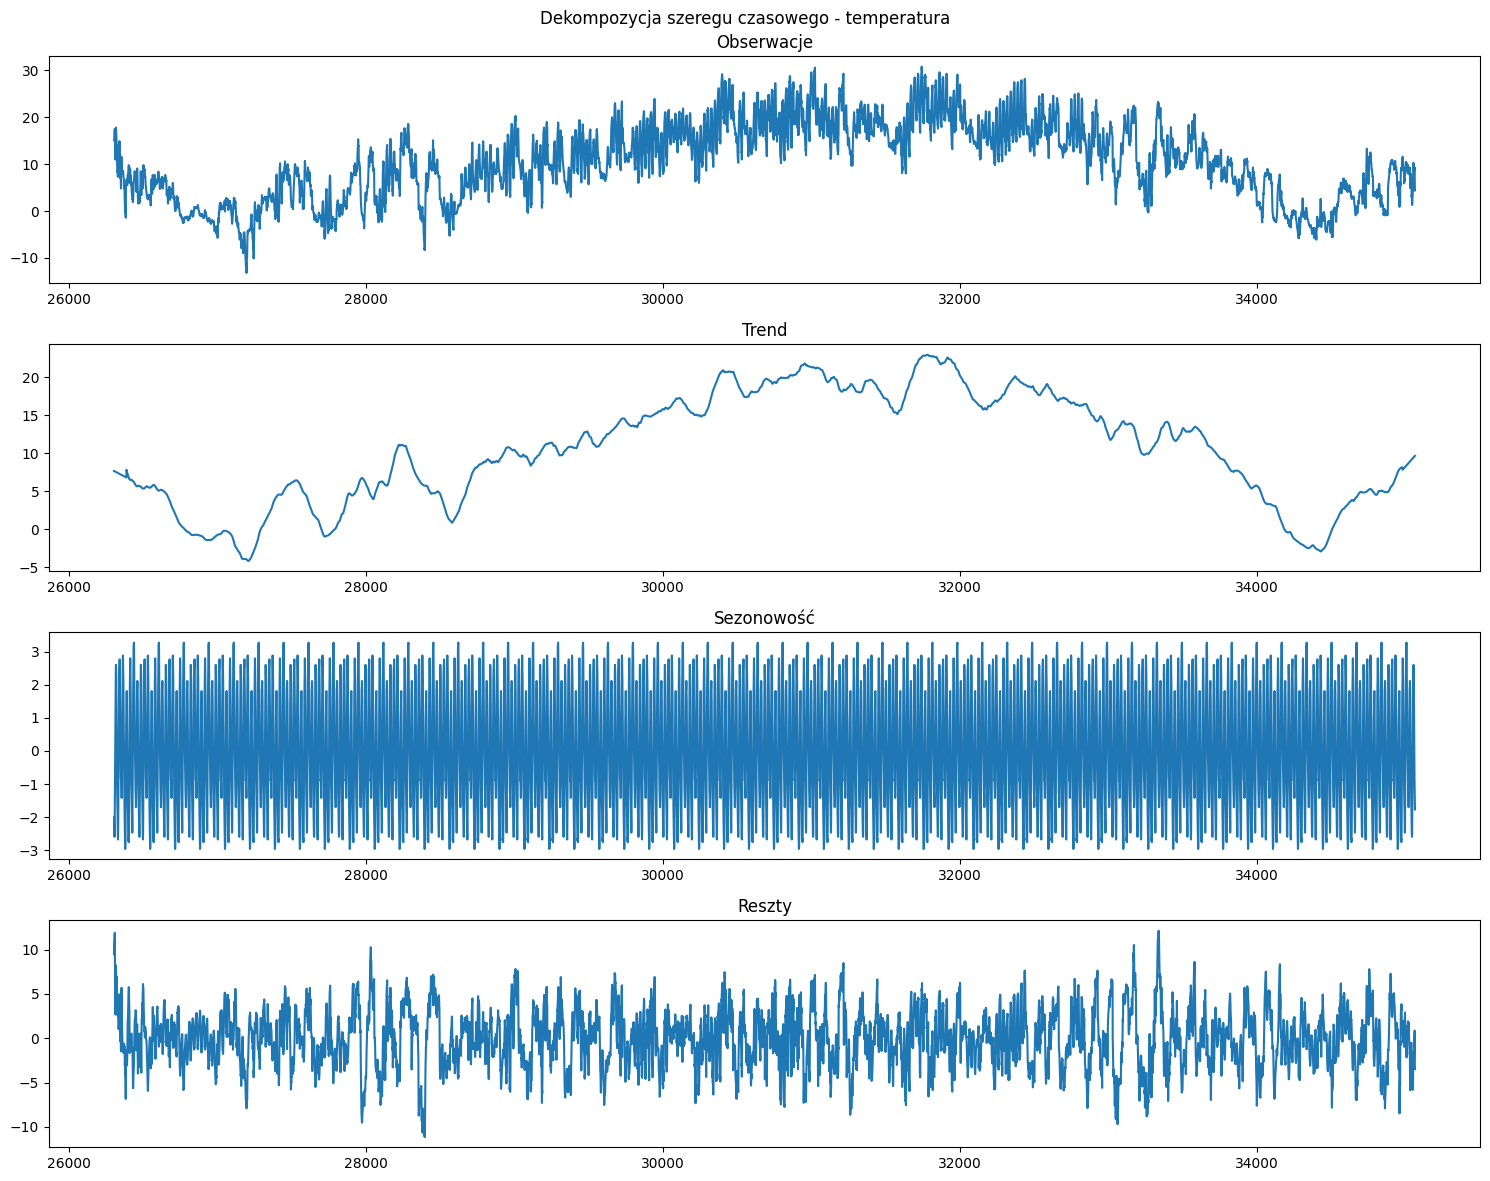

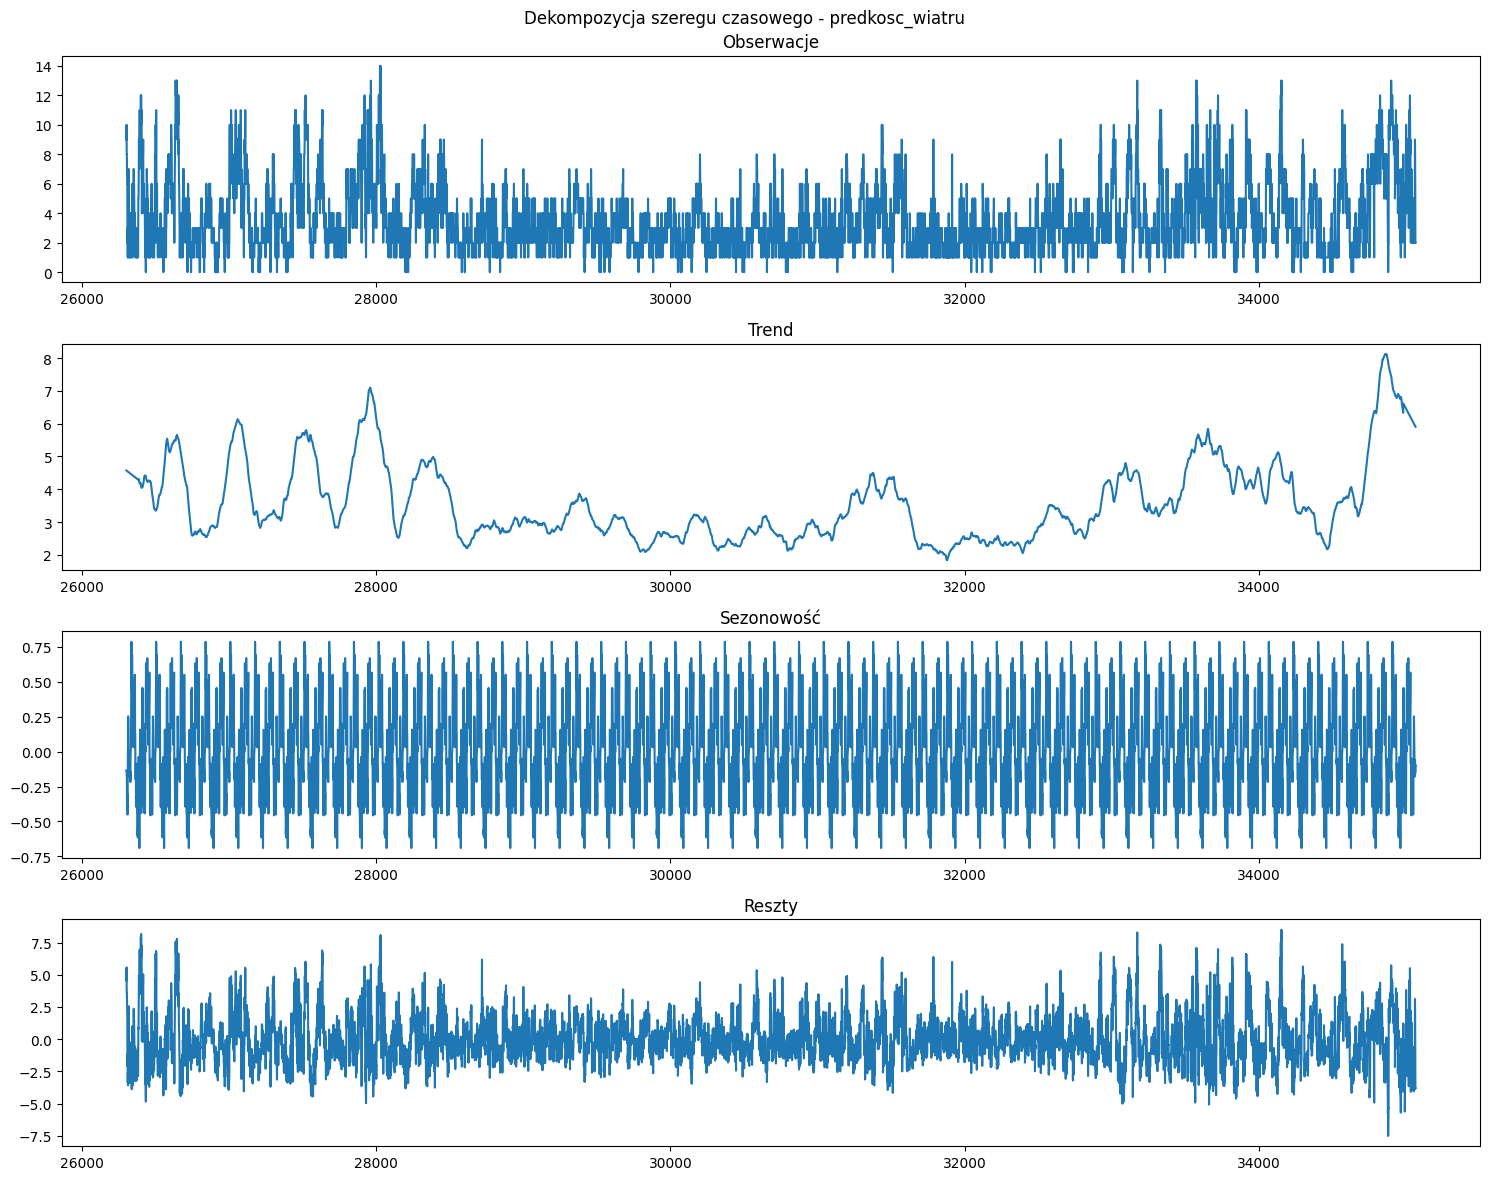

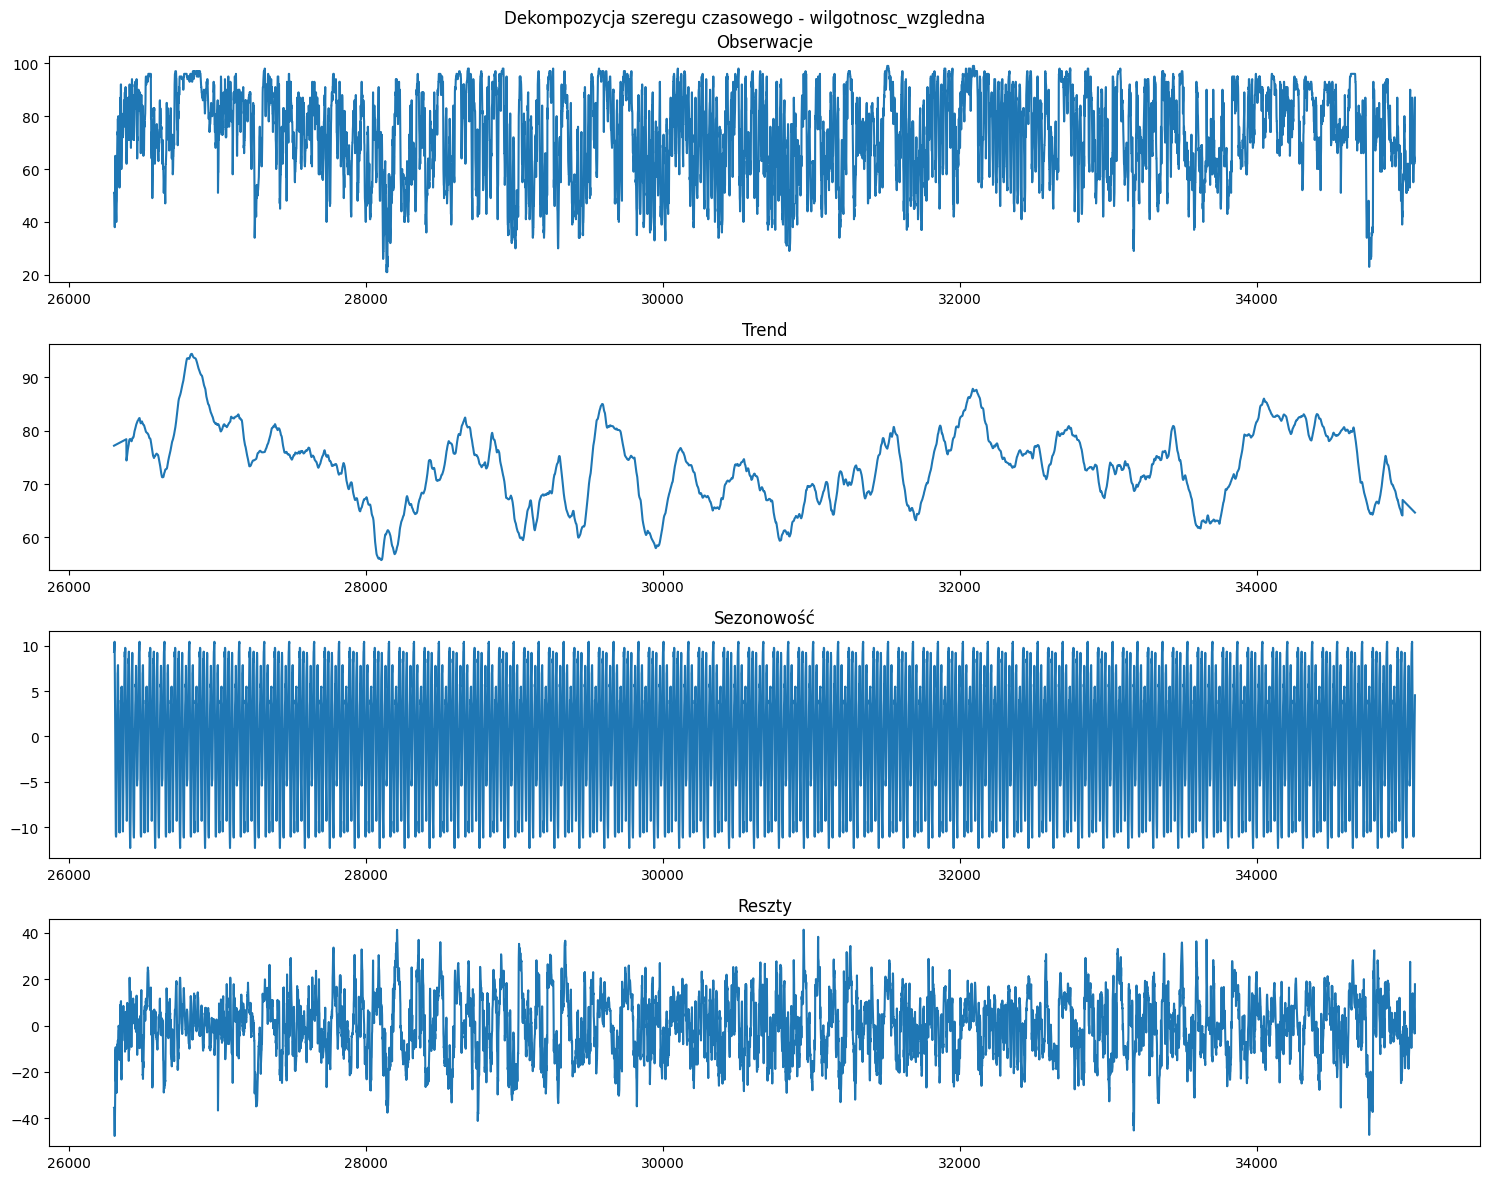

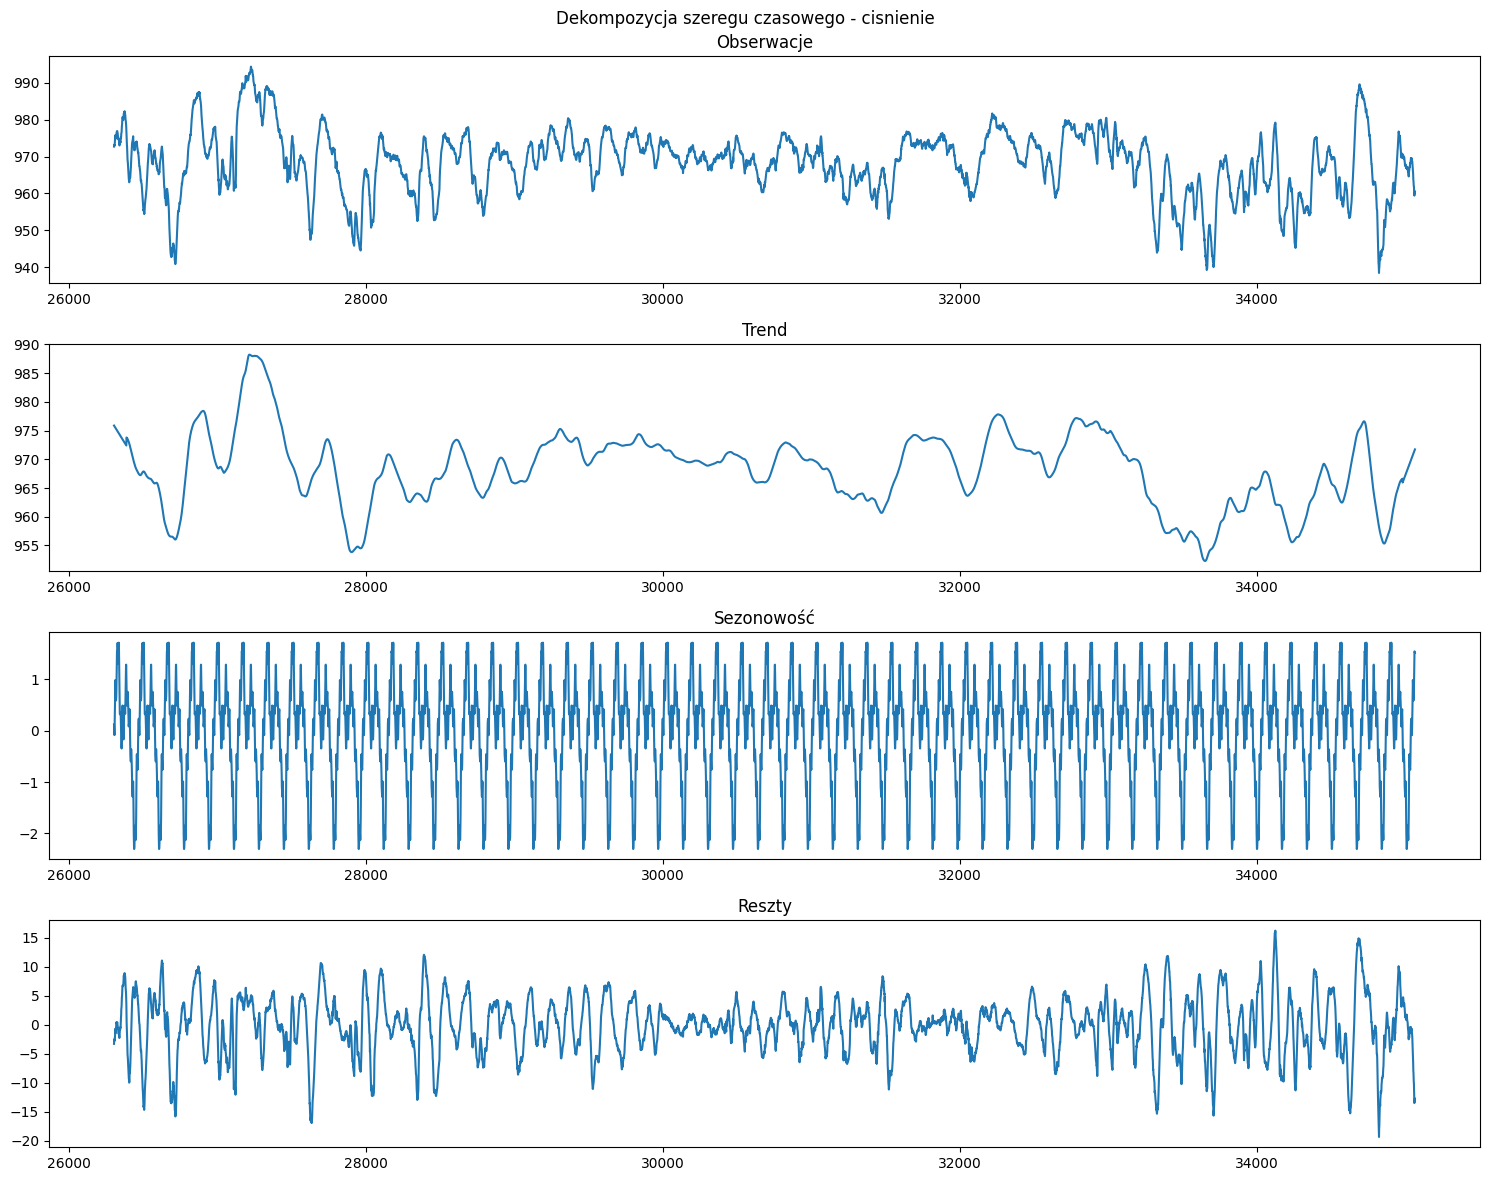

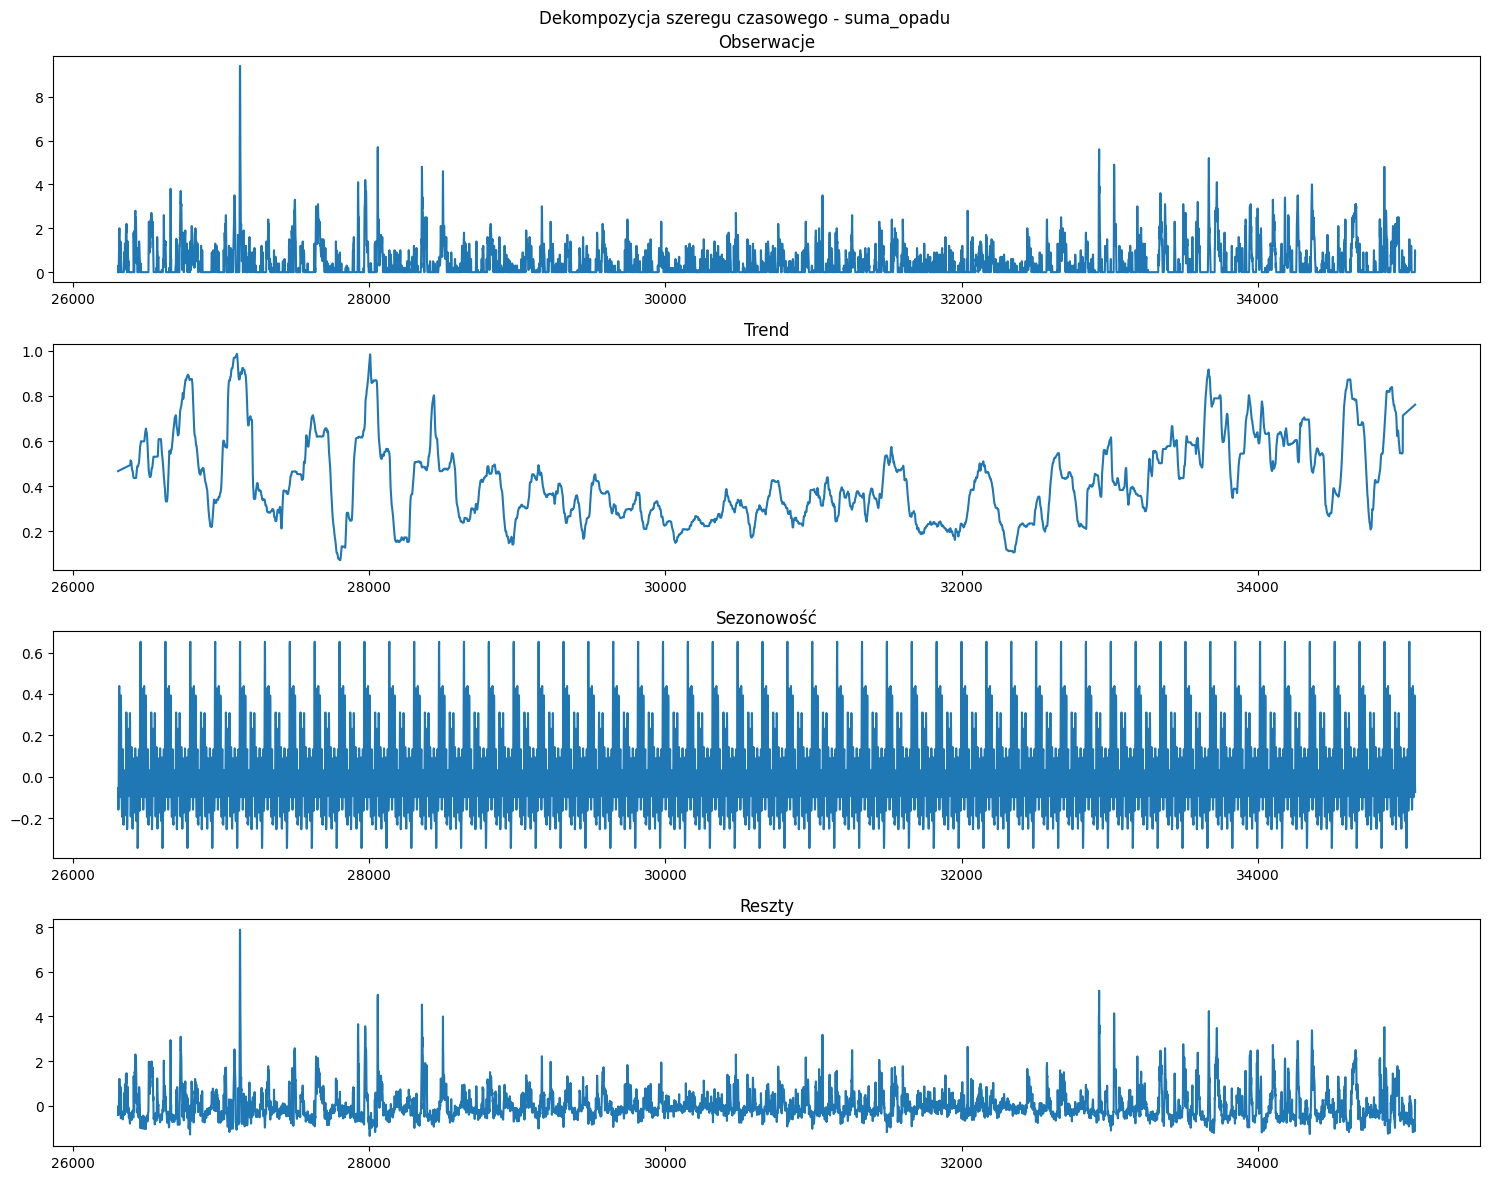

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

numeric_columns = ['temperatura', 'predkosc_wiatru', 'wilgotnosc_wzgledna', 'cisnienie', 'suma_opadu']

df_2023 = df[df['data_pomiaru'].dt.year == 2023]
for col in numeric_columns:
    decomposition = seasonal_decompose(df_2023[col], 
                                     period=24*7,
                                     extrapolate_trend='freq')
    
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,12))
    fig.suptitle(f'Dekompozycja szeregu czasowego - {col}')
    decomposition.observed.plot(ax=ax1, title='Obserwacje')
    decomposition.trend.plot(ax=ax2, title='Trend')
    decomposition.seasonal.plot(ax=ax3, title='Sezonowość')
    decomposition.resid.plot(ax=ax4, title='Reszty')
    plt.tight_layout()